In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

csv中保存的是某网站的每日pv，本节筛出异常点，需要考虑有周期性的波动

In [19]:
csv_path = '../PrivateDatasets/sample#3.csv'
df = pd.read_csv(csv_path)
df

,日期,pv
0,2017/12/31,874185
1,2017/12/30,1062207
2,2017/12/29,1090762
3,2017/12/28,1093813
4,2017/12/27,1089604
5,2017/12/26,1073583
6,2017/12/25,896523
7,2017/12/24,918468
8,2017/12/23,1079017
9,2017/12/22,1107021


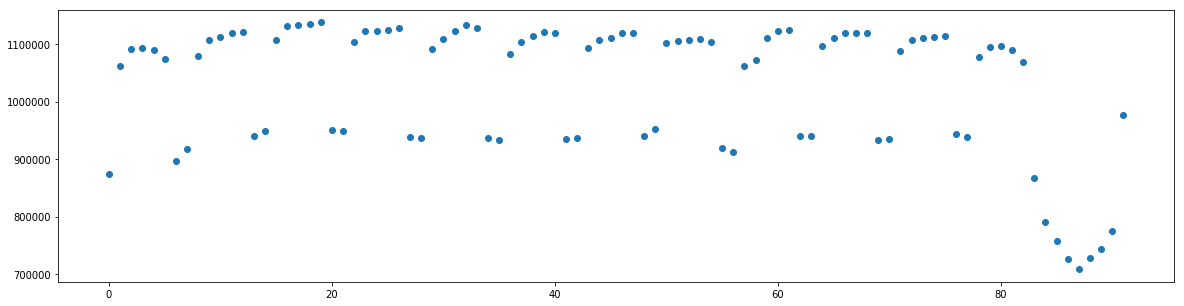

In [20]:
fig,ax = plt.subplots(figsize=(20,5))
plt.scatter(np.arange(len(df['pv'])),df['pv']);

In [21]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

In [22]:
px = [int(x) for x in df['pv']]
ff = pd.DataFrame(px, columns=['pv']).reset_index()

Text(0.5,1.01,'Total Clusters: 5')

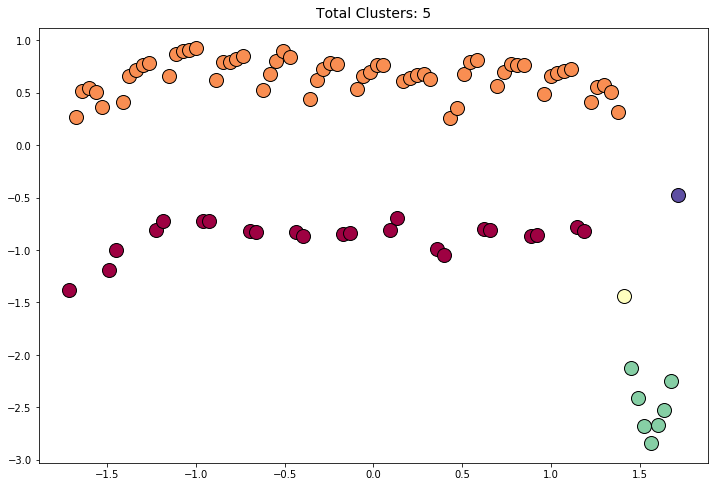

In [23]:
X = StandardScaler().fit_transform(ff)
db = DBSCAN(eps=.5, min_samples=1).fit(X)

labels = db.labels_
clusters = len(set(labels))
unique_labels = set(labels)
colors = plt.cm.Spectral(np.linspace(0,
                        1, len(unique_labels)))

plt.subplots(figsize=(12,8))

for k, c in zip(unique_labels, colors):
    class_member_mask = (labels == k)
    xy = X[class_member_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o',
             markerfacecolor=c,
             markeredgecolor='k',
             markersize=14)

plt.title("Total Clusters: {}".format(clusters),
          fontsize=14, y=1.01)

In [ ]:
def test_clusters(data_series, eps_val, swap_index, swap_value):
    data_series[swap_index] = swap_value
    ff = pd.DataFrame(data_series, columns=['fare']).reset_index()
    X = StandardScaler().fit_transform(ff)
    db = DBSCAN(eps=eps_val, min_samples=1).fit(X)

    labels = db.labels_
    clusters = len(set(labels))
    unique_labels = set(labels)
    colors = plt.cm.Spectral(np.linspace(0,
                            1, len(unique_labels)))

    plt.subplots(figsize=(12,8))

    for k, c in zip(unique_labels, colors):
        class_member_mask = (labels == k)
        xy = X[class_member_mask]
        plt.plot(xy[:, 0], xy[:, 1], 'o',
                 markerfacecolor=c,
                 markeredgecolor='k',
                 markersize=14)

    plt.title("Total Clusters: {}".format(clusters),
              fontsize=14, y=1.01)

In [ ]:
px = [x for x in fares['price']]

In [ ]:
px[55]

In [ ]:
test_clusters(px, 1.5, 55, 700)

In [ ]:
px[55]

In [ ]:
px[55] = 625

In [ ]:
ff = pd.DataFrame(px, columns=['fare']).reset_index()

In [ ]:
X = StandardScaler().fit_transform(ff)
db = DBSCAN(eps=1.5, min_samples=1).fit(X)

labels = db.labels_
clusters = len(set(labels))
unique_labels = set(labels)
colors = plt.cm.Spectral(np.linspace(0,
                        1, len(unique_labels)))

plt.subplots(figsize=(12,8))

for k, c in zip(unique_labels, colors):
    class_member_mask = (labels == k)
    xy = X[class_member_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o',
             markerfacecolor=c,
             markeredgecolor='k',
             markersize=14)

plt.title("Total Clusters: {}".format(clusters),
          fontsize=14, y=1.01)

In [ ]:
pf = pd.concat([ff,pd.DataFrame(db.labels_,
                                columns=['cluster'])], axis=1)
pf

In [ ]:
rf = pf.groupby('cluster')['fare'].agg(['min','count']).sort_values('min', ascending=True)
rf

In [ ]:
rf.iloc[0]['min']

In [ ]:
pf['fare'].min()

In [ ]:
rf.describe([.10,.25,.5,.75,.9])

In [ ]:
# we want min of the price cluster to equal the overall min 
# as well as to be in the bottom quartile of sizes

In [ ]:
rf['count'].quantile(.10)

In [ ]:
pd.Series([50,6,4]).quantile(.10)